# Playing with some Noise

In [61]:
import importlib
import scipy.ndimage

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from scipy import interpolate

import core.noise as noise
 
importlib.reload(noise)

<module 'core.noise' from 'D:\\Git\\Noise\\core\\noise.py'>

In [62]:
toast, butter, wurst = noise.base_grid(32)

In [63]:
# Set up gaussian filter
sigma_y = 2.0
sigma_x = 2.0

sigma = [sigma_y, sigma_x]

In [64]:
# Apply gaussian filter
toast = sp.ndimage.filters.gaussian_filter(toast, sigma, mode='constant')

In [65]:
toast = np.repeat(toast, 4, axis=0)
toast = np.repeat(toast, 4, axis=1)

In [66]:
# Apply gaussian filter
butter = sp.ndimage.filters.gaussian_filter(butter, sigma, mode='constant')
butter = np.repeat(butter, 2, axis=0)
butter = np.repeat(butter, 2, axis=1)

In [67]:
# Apply gaussian filter
wurst = sp.ndimage.filters.gaussian_filter(wurst, sigma, mode='constant')
wurst = np.repeat(wurst, 1, axis=0)
wurst = np.repeat(wurst, 1, axis=1)

In [68]:
toast_butter_wurst = toast + butter + wurst

toast_butter_wurst_smooth = sp.ndimage.filters.gaussian_filter(toast_butter_wurst, sigma, mode='constant')

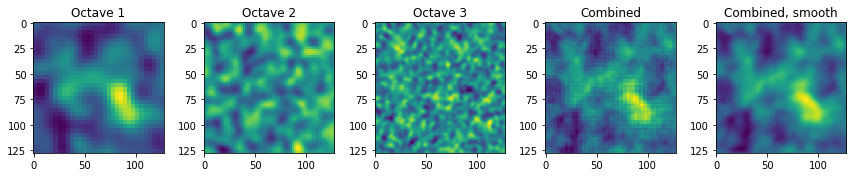

In [69]:
plt.figure(figsize=(12, 6))

plt.subplot(151)
plt.title('Octave 1')
plt.imshow(toast)

plt.subplot(152)
plt.title('Octave 2')
plt.imshow(butter)

plt.subplot(153)
plt.title('Octave 3')
plt.imshow(wurst)

plt.subplot(154)
plt.title('Combined')
plt.imshow(toast_butter_wurst)

plt.subplot(155)
plt.title('Combined, smooth')
plt.imshow(toast_butter_wurst_smooth)

plt.subplots_adjust(wspace=0.25)
plt.tight_layout()

plt.savefig('Layers.png', dpi=320)

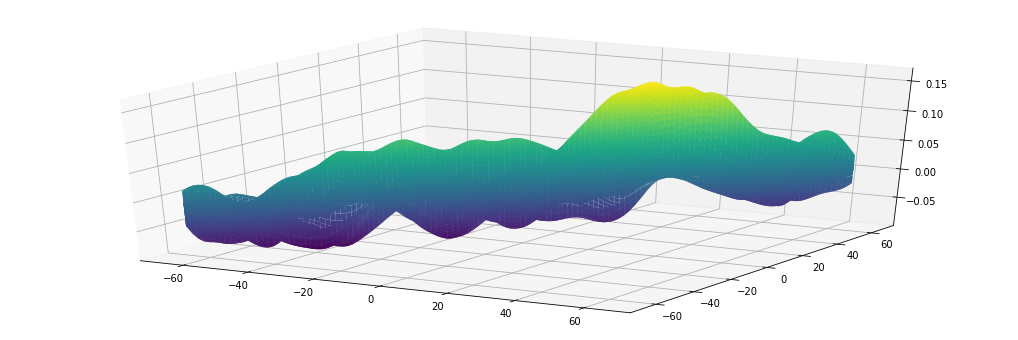

In [70]:
fig = plt.figure(figsize=(18,6))

ax = plt.axes(projection='3d')

len_x = len(toast_butter_wurst_smooth)

x = np.linspace(-len_x/2, len_x/2, len_x)
y = np.linspace(-len_x/2, len_x/2, len_x)

ax.plot_surface(x, y, 
                toast_butter_wurst_smooth,
                rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

plt.savefig('3d_surface.png', dpi=320);